In [1]:
from retinaface import RetinaFace
from deepface.DeepFace import VGGFace
from deepface.commons import functions
from deepface import DeepFace as df

from tensorflow.keras.layers import Convolution2D, Flatten, Activation, ZeroPadding2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

import numpy as np
import matplotlib.cm as cm
from IPython.display import Image, display
import cv2
import matplotlib.pyplot as plt


# 이미지 path를 정하고, retinaface를 실행

In [3]:
img_path = "IZ.jpg"

In [4]:
resp = RetinaFace.detect_faces(img_path)

In [5]:
resp # 단체사진에서 각 인물들의 위치를 출력

{'face_1': {'score': 0.9994434714317322,
  'facial_area': [2974, 789, 3162, 1032],
  'landmarks': {'right_eye': [3034.819, 909.3675],
   'left_eye': [3115.0078, 872.0769],
   'nose': [3103.018, 936.6774],
   'mouth_right': [3074.0964, 988.31903],
   'mouth_left': [3139.173, 959.4092]}},
 'face_2': {'score': 0.9993415474891663,
  'facial_area': [2587, 768, 2773, 998],
  'landmarks': {'right_eye': [2642.2173, 852.42175],
   'left_eye': [2728.7104, 865.27405],
   'nose': [2679.3513, 915.1166],
   'mouth_right': [2637.7595, 938.54816],
   'mouth_left': [2706.0066, 949.52]}},
 'face_3': {'score': 0.9991714954376221,
  'facial_area': [3182, 263, 3359, 501],
  'landmarks': {'right_eye': [3210.1309, 368.0151],
   'left_eye': [3283.3875, 358.48248],
   'nose': [3234.7554, 412.8554],
   'mouth_right': [3229.7422, 449.75018],
   'mouth_left': [3288.0393, 441.67142]}},
 'face_4': {'score': 0.9988583326339722,
  'facial_area': [381, 674, 563, 909],
  'landmarks': {'right_eye': [438.52243, 777.6814]

In [6]:
frame = []
for i in range(1,len(resp)+1):
    frame.append(resp['face_{}'.format(i)]['facial_area'])

In [7]:
len(frame)
frame

[[2974, 789, 3162, 1032],
 [2587, 768, 2773, 998],
 [3182, 263, 3359, 501],
 [381, 674, 563, 909],
 [2264, 287, 2439, 530],
 [879, 217, 1049, 445],
 [1751, 278, 1912, 480],
 [523, 131, 691, 361],
 [1891, 633, 2069, 870],
 [1160, 693, 1332, 922],
 [2673, 236, 2841, 471],
 [1256, 312, 1427, 540]]

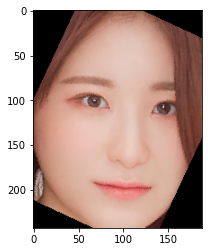

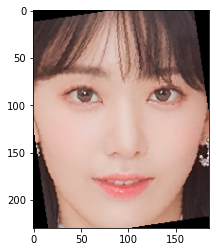

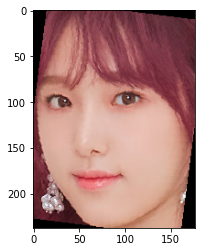

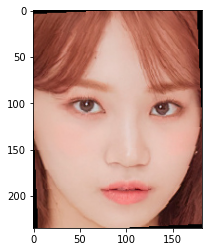

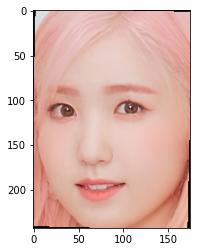

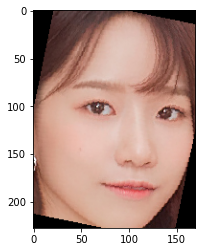

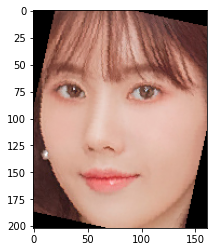

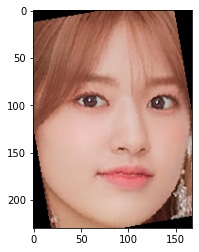

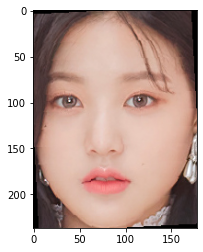

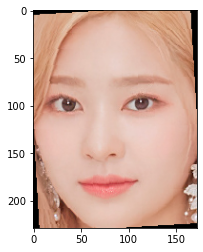

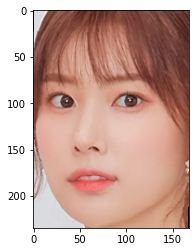

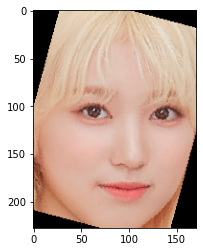

In [8]:
faces = RetinaFace.extract_faces(img_path = img_path, align = True)
for face in faces:
    plt.imshow(face)
    plt.show()

In [9]:
imgcount = len(faces)
for i in range(imgcount):
    plt.imsave('./images/face_{}.jpg'.format(i+1),faces[i])

# deepface를 사용하여 얼굴을 분석

In [11]:

for j in range(1,len(resp)+1):
    obj = df.analyze('./images/face_{}.jpg'.format(j), actions = ['emotion','age','gender'], enforce_detection = False)
    frame[j-1].append(obj['dominant_emotion'])
    frame[j-1].append(obj['emotion'][obj['dominant_emotion']])
    frame[j-1].append(obj['age'])
    frame[j-1].append(obj['gender'])
    

Action: gender: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.86it/s]


In [12]:
len(frame)

12

In [13]:
for i in range(1,len(resp)+1):
    frame[i-1][5] = round(frame[i-1][5],2)
    frame[i-1].append(frame[i-1][4])
    frame[i-1][4] = frame[i-1][4]+' '+str(frame[i-1][5])

In [14]:
frame

[[2974, 789, 3162, 1032, 'happy 97.39', 97.39, 28, 'Woman', 'happy'],
 [2587, 768, 2773, 998, 'neutral 99.77', 99.77, 31, 'Woman', 'neutral'],
 [3182, 263, 3359, 501, 'neutral 80.72', 80.72, 28, 'Woman', 'neutral'],
 [381, 674, 563, 909, 'neutral 98.98', 98.98, 27, 'Woman', 'neutral'],
 [2264, 287, 2439, 530, 'neutral 63.08', 63.08, 28, 'Woman', 'neutral'],
 [879, 217, 1049, 445, 'happy 89.02', 89.02, 29, 'Woman', 'happy'],
 [1751, 278, 1912, 480, 'neutral 98.96', 98.96, 29, 'Woman', 'neutral'],
 [523, 131, 691, 361, 'neutral 97.83', 97.83, 30, 'Woman', 'neutral'],
 [1891, 633, 2069, 870, 'fear 93.49', 93.49, 26, 'Woman', 'fear'],
 [1160, 693, 1332, 922, 'neutral 99.77', 99.77, 30, 'Woman', 'neutral'],
 [2673, 236, 2841, 471, 'neutral 95.87', 95.87, 30, 'Woman', 'neutral'],
 [1256, 312, 1427, 540, 'happy 76.48', 76.48, 28, 'Woman', 'happy']]

In [15]:
import cv2
img = cv2.imread(img_path)

In [16]:
frame

[[2974, 789, 3162, 1032, 'happy 97.39', 97.39, 28, 'Woman', 'happy'],
 [2587, 768, 2773, 998, 'neutral 99.77', 99.77, 31, 'Woman', 'neutral'],
 [3182, 263, 3359, 501, 'neutral 80.72', 80.72, 28, 'Woman', 'neutral'],
 [381, 674, 563, 909, 'neutral 98.98', 98.98, 27, 'Woman', 'neutral'],
 [2264, 287, 2439, 530, 'neutral 63.08', 63.08, 28, 'Woman', 'neutral'],
 [879, 217, 1049, 445, 'happy 89.02', 89.02, 29, 'Woman', 'happy'],
 [1751, 278, 1912, 480, 'neutral 98.96', 98.96, 29, 'Woman', 'neutral'],
 [523, 131, 691, 361, 'neutral 97.83', 97.83, 30, 'Woman', 'neutral'],
 [1891, 633, 2069, 870, 'fear 93.49', 93.49, 26, 'Woman', 'fear'],
 [1160, 693, 1332, 922, 'neutral 99.77', 99.77, 30, 'Woman', 'neutral'],
 [2673, 236, 2841, 471, 'neutral 95.87', 95.87, 30, 'Woman', 'neutral'],
 [1256, 312, 1427, 540, 'happy 76.48', 76.48, 28, 'Woman', 'happy']]

In [17]:
people = [0,0,0]
mcnt = 0
wcnt = 0
for i in range(len(resp)):
    if frame[i][7] == "Man":
        mcnt += 1
    else:
        wcnt += 1
if not wcnt==0:
    people[0] = mcnt/(wcnt+mcnt)
else:
    people[0] = 100
    
ages = 0
for i in range(len(resp)):
    ages += frame[i][6]
people[1] = ages/len(resp)

'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'

an = 0
dis = 0
fe = 0
ha = 0
sad = 0
sur = 0
ne = 0

for i in range(len(resp)):
    if frame[i][8] == 'angry':
        an += 1
    elif frame[i][8] == 'disgust':
        dis += 1
    elif frame[i][8] == 'fear':
        fe += 1
    elif frame[i][8] == 'happy':
        ha += 1
    elif frame[i][8] == 'sad':
        sad += 1
    elif frame[i][8] == 'surprise':
        sur += 1
    else:
        ne += 1
pframe = [[an,'angry'],[dis,"disgust"],[fe,"fear"],[ha,"happy"],[sad,"sad"],[sur,"surprise"],[ne,"neutral"]]
people[2] = max(pframe)

In [18]:
people

[0.0, 28.666666666666668, [8, 'neutral']]

In [19]:
people[1] = round(people[1],2)
people[0] = round(people[0],2)

In [20]:
img = cv2.imread(img_path)

# opencv를 활용하여 분석했던 결과들을 이미지에 합성

In [21]:
img = cv2.imread(img_path)
font = cv2.FONT_HERSHEY_TRIPLEX
for i in range(len(resp)):
    cv2.line(img, (frame[i][0],frame[i][1]-60), (frame[i][0]+200,frame[i][1]-60), (255, 255, 255), 100)

for i in range(len(resp)):
    cv2.rectangle(img,(frame[i][0],frame[i][1]),(frame[i][2],frame[i][3]),(0,255,0),3)
#     cv2.line(img, (frame[i][0],frame[i][1]-60), (frame[i][0]+200,frame[i][1]-60), (255, 255, 255), 100)
    cv2.putText(img, frame[i][7], (frame[i][0]-20,frame[i][1]-10), font, 1, (0,0,200), 2)
    cv2.putText(img, frame[i][4], (frame[i][0]-20,frame[i][1]-40), font, 1, (0,0,200), 2)
    cv2.putText(img, str(frame[i][6]), (frame[i][0]-20,frame[i][1]-65), font, 1, (0,0,200), 2)
    cv2.putText(img, "gender ratio: {}".format(people[0]),(10,img.shape[0]-50),font,3,(0,0,200),5)
    cv2.putText(img, "average age: {}".format(people[1]),(10,img.shape[0]-150),font,3,(0,0,200),5)
    cv2.putText(img, "mood: {}".format(people[2][1]),(10,img.shape[0]-250),font,3,(0,0,200),5)
    
    

dst = cv2.resize(img, dsize=(int(img.shape[1]/2.3), int(img.shape[0]/2.3)), interpolation=cv2.INTER_AREA)
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()    

# 판단근거 시각화(age)

In [22]:
iz = cv2.imread("IZ.jpg")
iz = functions.preprocess_face(iz,target_size = (226,226),grayscale = False,enforce_detection = False)

# vggface 모델을 베이스로 하는 age 판단 모델 선언

In [23]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu',name = 'last'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [24]:
#--------------------------

classes = 101
base_model_output = Sequential()
base_model_output = Convolution2D(classes, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)

#--------------------------

age_model = Model(inputs=model.input, outputs=base_model_output)

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_61 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_62 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_63 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 112, 112, 128)    

# gradcam 사용

In [26]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


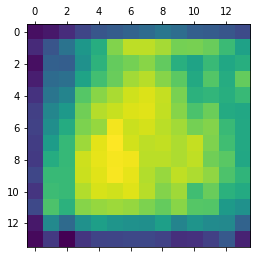

In [28]:
heatmap = make_gradcam_heatmap(iz,model,'last')
plt.matshow(heatmap)
plt.show()

In [29]:
#minmax scaling
temp = heatmap
min_max_scaler = preprocessing.MinMaxScaler()
temp = min_max_scaler.fit_transform(temp)

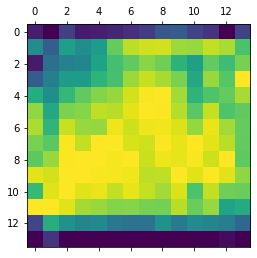

In [30]:
plt.matshow(temp)
plt.show()

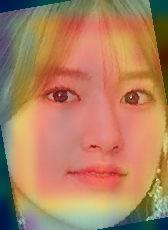

In [31]:
save_and_display_gradcam('./images/face_8.jpg', heatmap)

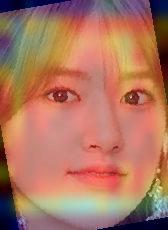

In [32]:
save_and_display_gradcam('./images/face_8.jpg', temp)